# PC Test Environ Maker

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tangle import Tangle, node_graph, watcher, analyser
from PC_classes import mal_node

plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

## Experiment 1

This is a test experiment, I didn't need to actually make a conflicting transaction here as we aren't monitoring the orphan status of the original transaction. We are instead measuring the number of tip confirmations.

This experiment will test the number of tip confirmations of a system built with a parasite chain and a system with the same number of transactions without the parastie chain.

### PC Tangle CLength = 10

Here I declare the node graph used for the experiments. In this case it is 4 normal nodes and one malicious node.

Next I design the transactions in the series. As this is a low load tangle I add a wait time based on the rate of the tangle (in this case 3) to ensure the rate of transactions (and therefore confirmations) is slower. The simulation is then ran for a minute. The output will be recorded in csv files and output.

In [13]:
for trial in range(1,101):
    ### Instantiating all the classes   ###
    t = Tangle(rate=3, tip_selection='mcmc', plot=True)
    ng = node_graph(t)
    w = watcher(t, ng, trial)

    ### Adding nodes to the node graph  ###
    for n in range(4):
        ng.new_node()
    ng.new_node(mal=True, watch=w)

    ### Adding Transactions ###

    for j in range(2):
        for i in range(4):
            ng.nodes[i].issue_transaction()
            w.update()
    
    ### Adding the PC   ###

    ng.nodes[-1].issue_bad_transaction()
    PC_issue_time = t.time                  # This was added to keep track of when the transaction is added.
    w.PC_add_time = t.time
    w.update()
    ng.nodes[-1].spam_transactions(10)
    badNode = ng.nodes[-1]
    print(badNode.chain)

    ### Running the simulation  ###

    while t.time < 60:
        node = np.random.randint(0, 4)
        dt_time = np.random.exponential(1.0/t.rate)
        t.time += dt_time
        ng.nodes[node].issue_transaction()
        w.update()
        print(t.time)

    w.output_to_sheet()



First node
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x00000201FC2CC710>]
Edges []
Node IDS [0]
Weights [[0, 510, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x00000201FC2CC710>, <tangle.node object at 0x00000201FC68F290>]
Edges [(1, 0)]
Node IDS [0, 1]
Weights [[0, 510, 1], [1, 932, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x00000201FC2CC710>, <tangle.node object at 0x00000201FC68F290>, <tangle.node object at 0x00000201FC68E8D0>]
Edges [(1, 0), (2, 1), (2, 0)]
Node IDS [0, 1, 2]
Weights [[0, 510, 1], [1, 932, 1], [2, 1011, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x00000201FC2CC710>, <tangle.node object at 0x00000201FC68F290>, <tangle.node object at 0x00000201FC68E8D0>, <tangle.node object at 0x00000201FC68E930>]
Edges [(1, 0), (2, 1), (2, 0), (3, 2), (3, 0)]
Node IDS [0, 1, 2, 3]
Weights [[0, 510, 1], [1, 932, 1], [2, 1011, 1], [3, 1228, 1]]
Finished upd

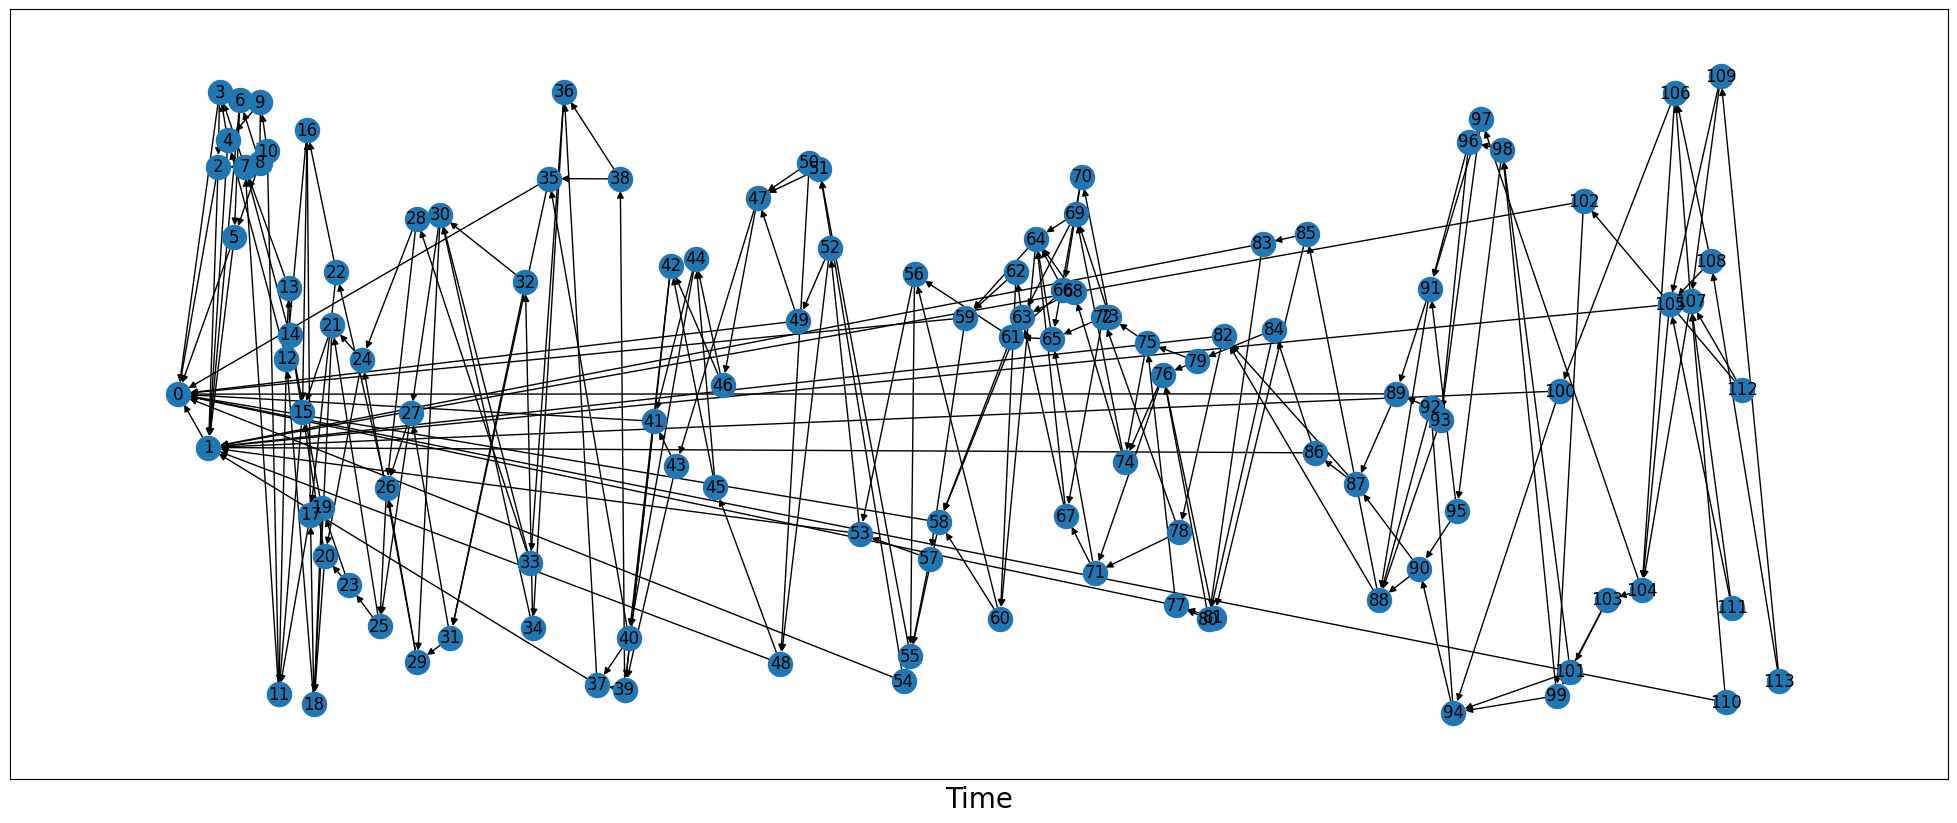

In [5]:
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.figure(figsize=(25, 10))
t.plot()

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 6, 6, 6, 6, 11, 12, 13, 13, 14, 16, 16, 17, 17, 17, 17, 19, 22, 23, 24, 26, 26, 26, 28, 28, 29, 30, 31, 31, 34, 34, 34, 34, 35, 35, 37, 39, 40, 40, 41, 41, 41, 41, 41, 46, 46, 46, 48, 50, 50, 52, 55, 55, 55, 57, 60, 60, 62, 64, 66, 66, 66, 66, 66, 67, 69, 69, 71, 71, 71, 73, 74, 76, 76, 76, 77, 77, 78, 79, 83, 84, 84, 85, 87, 89, 91, 92, 94, 95, 95, 96] [1.0, 1.3763809941945953, 2.4315075310654053, 2.5491144367859055, 2.649731901401067, 2.9556580762142075, 2.9805612257222536, 3.349237737450315, 4.260949015386033, 4.396768915680623, 4.735156478029424, 4.862135194380883, 4.958351573795969, 5.323758175109266, 6.061030554568478, 6.149769538741005, 6.393480292802649, 6.698471970337166, 6.839782508437537, 7.052315062021525, 7.531415585929317, 8.481855344699655, 8.520530867476559, 8.704634195339855, 9.120847024894, 10.548889179495479, 11.275300407312033, 12.26888955732313, 12.644246158522957, 13.428083956916037, 14.044098032906193, 14.543604

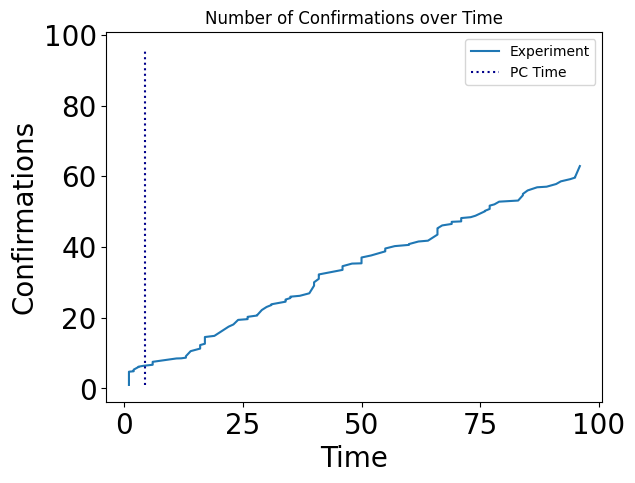

In [14]:
w.plot_confirm_over_time()
print(w.PC_add_time)

In [15]:
a = analyser()
results = a.get_res(100)

[[1, 1.0, 244], [2, 1.0, 308], [3, 1.0443686006825939, 293], [4, 1.4652567975830815, 331], [5, 2.684931506849315, 292], [6, 4.344202898550725, 276], [7, 7.059360730593608, 219], [8, 10.246231155778894, 199], [9, 12.55813953488372, 172], [10, 15.83030303030303, 165], [11, 17.055555555555557, 162], [12, 19.046153846153846, 130], [13, 20.31578947368421, 152], [14, 21.63225806451613, 155], [15, 22.535211267605632, 142], [16, 24.527950310559007, 161], [17, 26.30344827586207, 145], [18, 27.366197183098592, 142], [19, 28.86111111111111, 144], [20, 30.49056603773585, 159], [21, 31.841726618705035, 139], [22, 32.76335877862596, 131], [23, 34.352112676056336, 142], [24, 36.2108843537415, 147], [25, 37.80487804878049, 164], [26, 38.77857142857143, 140], [27, 40.61875, 160], [28, 41.798701298701296, 154], [29, 43.314465408805034, 159], [30, 45.21167883211679, 137], [31, 46.42, 150], [32, 48.191616766467064, 167], [33, 49.30344827586207, 145], [34, 51.05594405594405, 143], [35, 52.76687116564417, 1

[[1, 1.0, 244], [2, 1.0, 308], [3, 1.0443686006825939, 293], [4, 1.4652567975830815, 331], [5, 2.684931506849315, 292], [6, 4.344202898550725, 276], [7, 7.059360730593608, 219], [8, 10.246231155778894, 199], [9, 12.55813953488372, 172], [10, 15.83030303030303, 165], [11, 17.055555555555557, 162], [12, 19.046153846153846, 130], [13, 20.31578947368421, 152], [14, 21.63225806451613, 155], [15, 22.535211267605632, 142], [16, 24.527950310559007, 161], [17, 26.30344827586207, 145], [18, 27.366197183098592, 142], [19, 28.86111111111111, 144], [20, 30.49056603773585, 159], [21, 31.841726618705035, 139], [22, 32.76335877862596, 131], [23, 34.352112676056336, 142], [24, 36.2108843537415, 147], [25, 37.80487804878049, 164], [26, 38.77857142857143, 140], [27, 40.61875, 160], [28, 41.798701298701296, 154], [29, 43.314465408805034, 159], [30, 45.21167883211679, 137], [31, 46.42, 150], [32, 48.191616766467064, 167], [33, 49.30344827586207, 145], [34, 51.05594405594405, 143], [35, 52.76687116564417, 1

Text(0, 0.5, 'Confirmations')

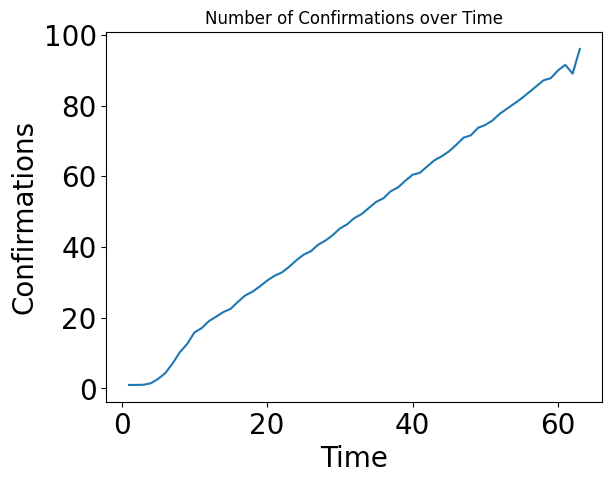

In [17]:
print(results)
df = pd.DataFrame(results)
confirmed = df[1].tolist()
times = df[0].tolist()
plt.plot(times, confirmed)
plt.title('Number of Confirmations over Time')
plt.xlabel('Time')
plt.ylabel('Confirmations')

In [18]:
df.to_csv("pc-r3-c10 100")

100 tests were run and preliminary results show a difference in the early PC attachment approval rate at chain length 10.

### PC Tangle CLength = 20

In [2]:
for trial in range(1,101):
    ### Instantiating all the classes   ###
    t = Tangle(rate=3, tip_selection='mcmc', plot=True)
    ng = node_graph(t)
    w = watcher(t, ng, trial)

    ### Adding nodes to the node graph  ###
    for n in range(4):
        ng.new_node()
    ng.new_node(mal=True, watch=w)

    ### Adding Transactions ###

    for j in range(2):
        for i in range(4):
            ng.nodes[i].issue_transaction()
            w.update()
    
    ### Adding the PC   ###

    ng.nodes[-1].issue_bad_transaction()
    PC_issue_time = t.time                  # This was added to keep track of when the transaction is added.
    w.PC_add_time = t.time
    w.update()
    ng.nodes[-1].spam_transactions(20)
    badNode = ng.nodes[-1]
    print(badNode.chain)

    ### Running the simulation  ###

    while t.time < 60:
        node = np.random.randint(0, 4)
        dt_time = np.random.exponential(1.0/t.rate)
        t.time += dt_time
        ng.nodes[node].issue_transaction()
        w.update()
        print(t.time)

    w.output_to_sheet()

First node
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x0000021DD61EDD00>]
Edges []
Node IDS [0]
Weights [[0, 1285, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x0000021DD61EDD00>, <tangle.node object at 0x0000021DD654EA20>]
Edges [(1, 0)]
Node IDS [0, 1]
Weights [[0, 1285, 1], [1, 1196, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x0000021DD61EDD00>, <tangle.node object at 0x0000021DD654EA20>, <tangle.node object at 0x0000021DD66DC380>]
Edges [(1, 0), (2, 1), (2, 0)]
Node IDS [0, 1, 2]
Weights [[0, 1285, 1], [1, 1196, 1], [2, 744, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x0000021DD61EDD00>, <tangle.node object at 0x0000021DD654EA20>, <tangle.node object at 0x0000021DD66DC380>, <tangle.node object at 0x0000021DD6501130>]
Edges [(1, 0), (2, 1), (2, 0), (3, 2), (3, 0)]
Node IDS [0, 1, 2, 3]
Weights [[0, 1285, 1], [1, 1196, 1], [2, 744, 1], [3, 837, 1]]
Finished

[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 4, 5, 6, 6, 7, 9, 9, 9, 9, 11, 11, 11, 11, 13, 19, 22, 23, 23, 23, 23, 23, 26, 26, 27, 27, 28, 30, 30, 30, 30, 30, 32, 33, 34, 35, 35, 35, 38, 38, 38, 39, 40, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 53, 53, 53, 53, 56, 56, 56, 58, 58, 60, 62, 64, 66, 67, 67, 67, 67, 68, 69, 70, 71, 72, 72, 77, 81, 81, 81, 85, 87, 89, 89, 89, 89, 89, 89, 89, 89, 91, 93, 93, 94, 94, 94, 95, 96, 96, 96, 96, 99, 105, 105, 105, 110, 111, 111, 114, 117] [1.0, 1.063183815598703, 1.1107843353627986, 1.2139143032394903, 1.2327914266768523, 2.2383189791335907, 2.9599558493615934, 3.366901841891889, 4.000039725117177, 4.1224437207460465, 4.680922366657226, 4.961711595089041, 5.304216708034928, 5.3625659503365215, 5.675728882524657, 5.730514380227241, 6.58788144199741, 6.71716640377882, 6.8775172755129885, 6.929626152689162, 7.08778521123757, 7.190420114958752, 7.277874970350027, 7.319014788450127, 7.335053996263234, 7.448766896521354, 7.890038416204545, 8.55147378554586

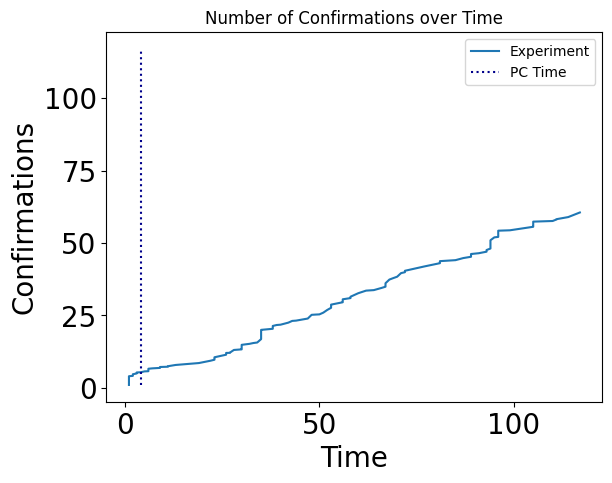

In [3]:
w.plot_confirm_over_time()
print(w.PC_add_time)

In [4]:
a = analyser()
results = a.get_res(100)

[[1, 1.0, 236], [2, 1.0, 312], [3, 1.019672131147541, 305], [4, 1.3240740740740742, 324], [5, 2.792387543252595, 289], [6, 5.203174603174603, 315], [7, 8.068181818181818, 308], [8, 11.26551724137931, 290], [9, 14.249056603773585, 265], [10, 17.404, 250], [11, 20.70048309178744, 207], [12, 22.98876404494382, 178], [13, 25.219354838709677, 155], [14, 27.59235668789809, 157], [15, 28.38064516129032, 155], [16, 29.872340425531913, 141], [17, 31.81437125748503, 167], [18, 32.81428571428572, 140], [19, 34.1437908496732, 153], [20, 35.46835443037975, 158], [21, 37.193333333333335, 150], [22, 37.80821917808219, 146], [23, 39.646153846153844, 130], [24, 40.97315436241611, 149], [25, 42.39354838709677, 155], [26, 44.72142857142857, 140], [27, 45.57931034482758, 145], [28, 47.63309352517986, 139], [29, 48.44375, 160], [30, 50.19496855345912, 159], [31, 51.602409638554214, 166], [32, 53.08552631578947, 152], [33, 54.863013698630134, 146], [34, 56.30821917808219, 146], [35, 57.35761589403973, 151],

[[1, 1.0, 236], [2, 1.0, 312], [3, 1.019672131147541, 305], [4, 1.3240740740740742, 324], [5, 2.792387543252595, 289], [6, 5.203174603174603, 315], [7, 8.068181818181818, 308], [8, 11.26551724137931, 290], [9, 14.249056603773585, 265], [10, 17.404, 250], [11, 20.70048309178744, 207], [12, 22.98876404494382, 178], [13, 25.219354838709677, 155], [14, 27.59235668789809, 157], [15, 28.38064516129032, 155], [16, 29.872340425531913, 141], [17, 31.81437125748503, 167], [18, 32.81428571428572, 140], [19, 34.1437908496732, 153], [20, 35.46835443037975, 158], [21, 37.193333333333335, 150], [22, 37.80821917808219, 146], [23, 39.646153846153844, 130], [24, 40.97315436241611, 149], [25, 42.39354838709677, 155], [26, 44.72142857142857, 140], [27, 45.57931034482758, 145], [28, 47.63309352517986, 139], [29, 48.44375, 160], [30, 50.19496855345912, 159], [31, 51.602409638554214, 166], [32, 53.08552631578947, 152], [33, 54.863013698630134, 146], [34, 56.30821917808219, 146], [35, 57.35761589403973, 151],

Text(0, 0.5, 'Confirmations')

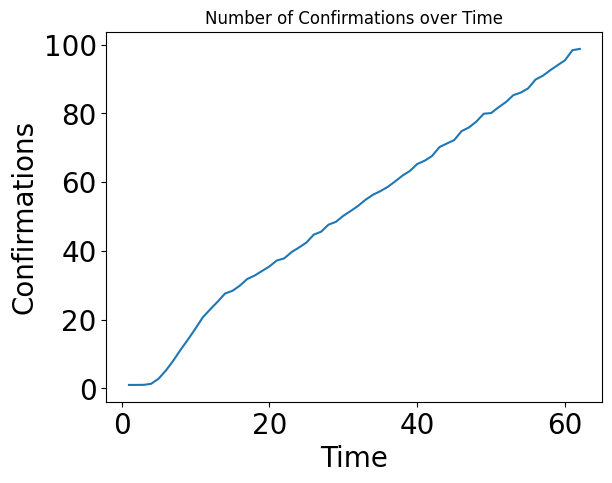

In [5]:
print(results)
df = pd.DataFrame(results)
confirmed = df[1].tolist()
times = df[0].tolist()
plt.plot(times, confirmed)
plt.title('Number of Confirmations over Time')
plt.xlabel('Time')
plt.ylabel('Confirmations')

In [6]:
df.to_csv("pc-r3-c20 100")

## Clength = 5

In [2]:
for trial in range(1,101):
    ### Instantiating all the classes   ###
    t = Tangle(rate=3, tip_selection='mcmc', plot=True)
    ng = node_graph(t)
    w = watcher(t, ng, trial)

    ### Adding nodes to the node graph  ###
    for n in range(4):
        ng.new_node()
    ng.new_node(mal=True, watch=w)

    ### Adding Transactions ###

    for j in range(2):
        for i in range(4):
            ng.nodes[i].issue_transaction()
            w.update()
    
    ### Adding the PC   ###

    ng.nodes[-1].issue_bad_transaction()
    PC_issue_time = t.time                  # This was added to keep track of when the transaction is added.
    w.PC_add_time = t.time
    w.update()
    ng.nodes[-1].spam_transactions(5)
    badNode = ng.nodes[-1]
    print(badNode.chain)

    ### Running the simulation  ###

    while t.time < 60:
        node = np.random.randint(0, 4)
        dt_time = np.random.exponential(1.0/t.rate)
        t.time += dt_time
        ng.nodes[node].issue_transaction()
        w.update()
        print(t.time)

    w.output_to_sheet()

First node
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x00000204FFC7DB50>]
Edges []
Node IDS [0]
Weights [[0, 446, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x00000204FFC7DB50>, <tangle.node object at 0x000002048D383B30>]
Edges [(1, 0)]
Node IDS [0, 1]
Weights [[0, 446, 1], [1, 1316, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x00000204FFC7DB50>, <tangle.node object at 0x000002048D383B30>, <tangle.node object at 0x00000204FFD49790>]
Edges [(1, 0), (2, 0), (2, 1)]
Node IDS [0, 1, 2]
Weights [[0, 446, 1], [1, 1316, 1], [2, 973, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x00000204FFC7DB50>, <tangle.node object at 0x000002048D383B30>, <tangle.node object at 0x00000204FFD49790>, <tangle.node object at 0x000002048DAE7170>]
Edges [(1, 0), (2, 0), (2, 1), (3, 2), (3, 1)]
Node IDS [0, 1, 2, 3]
Weights [[0, 446, 1], [1, 1316, 1], [2, 973, 1], [3, 1752, 1]]
Finished up

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 5, 5, 5, 5, 5, 5, 7, 9, 9, 12, 12, 12, 15, 16, 18, 19, 19, 20, 20, 23, 23, 25, 27, 29, 29, 29, 30, 31, 31, 32, 32, 33, 34, 35, 36, 37, 39, 39, 40, 42, 43, 44, 45, 45, 45, 47, 48, 48, 48, 49, 49, 51, 52, 53, 54, 56, 56, 56, 57, 57, 60, 60, 63, 63, 64, 64, 65, 66, 67, 68, 68, 69, 70, 71, 72, 72, 73, 76, 79, 79, 80, 84, 84, 84, 85, 86, 89] [1.0, 1.0871595870225983, 1.1607577428545393, 1.3082081695549026, 1.4051399627057544, 1.44600593561986, 1.5362471820513095, 1.7237607283145089, 2.072128370763852, 2.256009414326814, 2.282302484505806, 2.64004545570797, 3.5563674804503074, 4.26246887424112, 4.694897428695438, 5.204155073071668, 5.505360461029032, 5.725185922361821, 5.910986855582118, 6.670124254978621, 6.905623645449024, 8.097404759527096, 8.755202773249533, 9.260269668486172, 9.455043897578916, 10.526022751832475, 11.14326522264224, 12.797648896565768, 13.993044455953754, 14.43134505621121, 15.39809629635803, 15.896832096159168, 17.89574395323666,

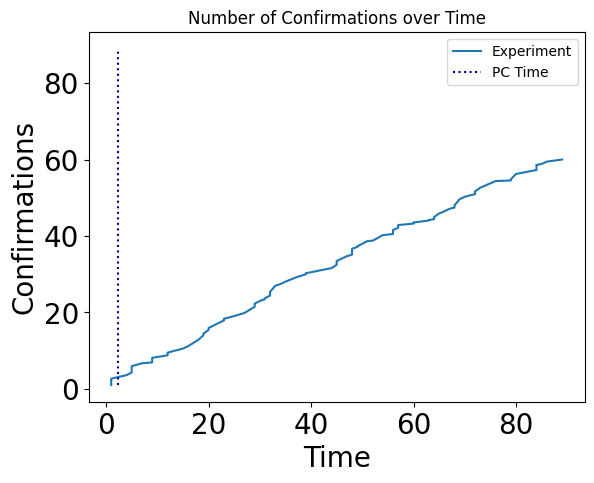

In [3]:
w.plot_confirm_over_time()
print(w.PC_add_time)
a = analyser()
results = a.get_res(100)

[[1, 1.0, 260], [2, 1.0, 291], [3, 1.0506756756756757, 296], [4, 1.4875444839857652, 281], [5, 2.3598326359832638, 239], [6, 3.7708333333333335, 192], [7, 5.977401129943503, 177], [8, 8.129411764705882, 170], [9, 9.458646616541353, 133], [10, 12.233333333333333, 150], [11, 13.648275862068965, 145], [12, 15.430555555555555, 144], [13, 17.123456790123456, 162], [14, 18.51497005988024, 167], [15, 20.033333333333335, 150], [16, 21.595890410958905, 146], [17, 23.34328358208955, 134], [18, 24.313253012048193, 166], [19, 26.10828025477707, 157], [20, 27.782894736842106, 152], [21, 28.992857142857144, 140], [22, 30.493150684931507, 146], [23, 31.854166666666668, 144], [24, 33.50877192982456, 171], [25, 34.967532467532465, 154], [26, 36.696969696969695, 165], [27, 38.07333333333333, 150], [28, 39.73287671232877, 146], [29, 40.625850340136054, 147], [30, 42.736111111111114, 144], [31, 44.0945945945946, 148], [32, 45.52054794520548, 146], [33, 47.12676056338028, 142], [34, 48.324503311258276, 151

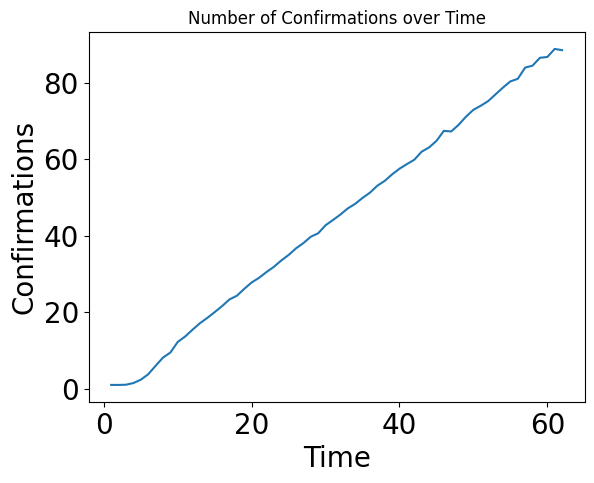

In [4]:
print(results)
df = pd.DataFrame(results)
confirmed = df[1].tolist()
times = df[0].tolist()
plt.plot(times, confirmed)
plt.title('Number of Confirmations over Time')
plt.xlabel('Time')
plt.ylabel('Confirmations')

df.to_csv("pc-r3-c5 100")

In [5]:
print(df)

     0          1    2
0    1   1.000000  260
1    2   1.000000  291
2    3   1.050676  296
3    4   1.487544  281
4    5   2.359833  239
..  ..        ...  ...
57  58  84.446043  139
58  59  86.509804  153
59  60  86.715447  123
60  61  88.822222   45
61  62  88.500000    4

[62 rows x 3 columns]
